In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# true relation between x and y
beta_0, beta_1 = 2, 3

def f(x):
    return beta_0 + beta_1 * x

In [3]:
# estimated relation between x and y
def get_olr_coeff(X, Y):
    beta_1_estimated = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
    beta_0_estimated = Y.mean() - beta_1_estimated * X.mean()
    return (beta_0_estimated, beta_1_estimated)

In [4]:
# plot the true relation and a bunch of estimated relations
num_data_points = 1000
num_trials = 10

X = np.linspace(-10, 10, num_data_points)
Y = np.vectorize(f)(X)

epsilon = np.random.normal(scale=20.0, size=(num_trials, num_data_points))
datasets = Y + epsilon
data_table = np.vstack((X, datasets))

<Axes: >

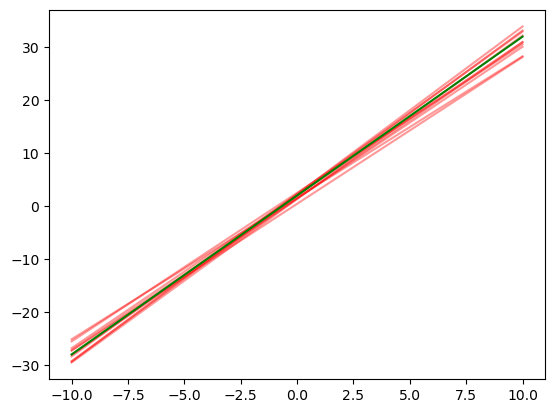

In [5]:
for i in range(1, data_table.shape[0]):
    beta_0, beta_1 = get_olr_coeff(data_table[0], data_table[i])
    sns.lineplot(x=X, y=beta_0 + beta_1 * X, alpha=0.4, color='red')

sns.lineplot(x=X, y=Y, color='green')

<Axes: >

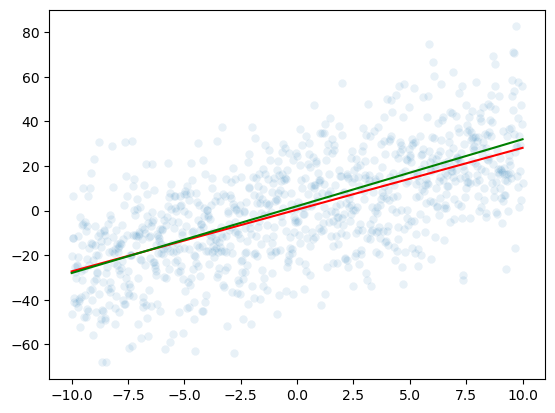

In [6]:
sns.scatterplot(x=data_table[0], y=data_table[1], alpha=0.1)
beta_0, beta_1 = get_olr_coeff(data_table[0], data_table[1])
sns.lineplot(x=X, y=beta_0 + beta_1 * X, color='red')
sns.lineplot(x=X, y=Y, color='green')